In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
single_image=xtrain[0]
single_image.shape

(28, 28)

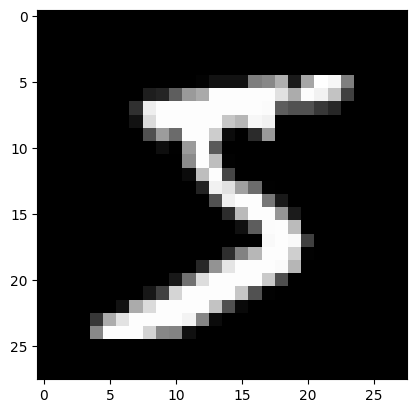

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
ytrain[0]

5

In [8]:
xtrain.min()

0

In [9]:
xtrain.max()

255

In [10]:
xtrain_scaled=xtrain/255.0
xtest_scaled=xtest/255.0

xtrain_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
xtrain_scaled.max()

1.0

In [12]:
ytrain_onehot=utils.to_categorical(ytrain,10)
ytest_onehot=utils.to_categorical(ytest,10)
ytrain_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
ytrain_onehot.shape

(60000, 10)

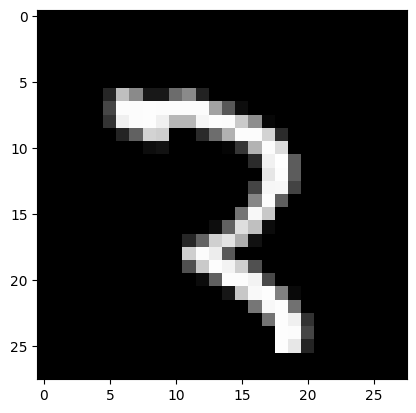

In [14]:
single_image=xtrain[500]
plt.imshow(single_image,cmap='gray')

In [15]:
ytrain_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
xtrain_scaled = xtrain_scaled.reshape(-1,28,28,1)
xtest_scaled = xtest_scaled.reshape(-1,28,28,1)
xtrain_scaled


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [17]:
from keras.api._v2.keras import activations
model=keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                        

In [19]:
# from keras.utils.sidecar_evaluator import optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [20]:
# from sklearn.utils import validation
model.fit(xtrain_scaled,ytrain_onehot,epochs=10,batch_size=64,validation_data=(xtest_scaled,ytest_onehot))


Epoch 1/10
938/938 [==============================] - 38s 37ms/step - loss: 0.2452 - accuracy: 0.9239 - val_loss: 0.0844 - val_accuracy: 0.9727
Epoch 2/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.0594 - val_accuracy: 0.9798
Epoch 3/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 4/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0501 - val_accuracy: 0.9834
Epoch 5/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0503 - val_accuracy: 0.9843
Epoch 7/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0504 - val_accuracy:

In [21]:
metrics = pd.DataFrame(model.history.history)

In [22]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.245240,0.923883,0.084411,0.9727
1,0.074899,0.977183,0.059388,0.9798
2,0.053327,0.983167,0.052774,0.9833
3,0.039024,0.987783,0.050063,0.9834
4,0.030720,0.990333,0.048969,0.9852


<Axes: >

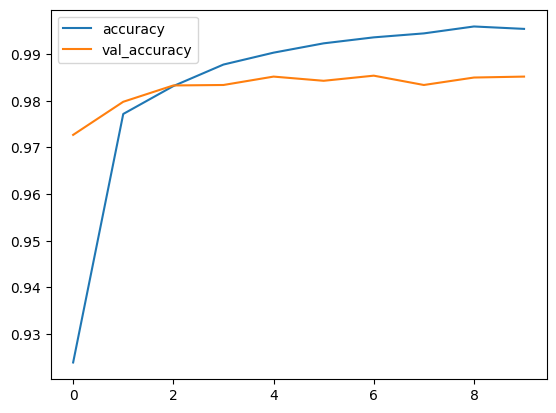

In [23]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

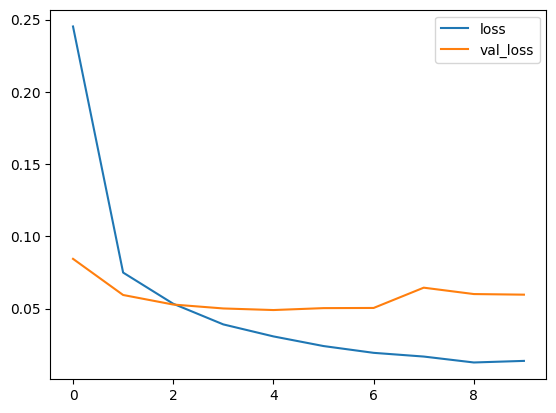

In [24]:
metrics[['loss','val_loss']].plot()

In [25]:
x_test_predictions = np.argmax(model.predict(xtest_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [26]:
print(confusion_matrix(ytest,x_test_predictions))

[[ 973    1    1    0    1    0    2    1    1    0]
 [   0 1132    0    1    0    0    1    1    0    0]
 [   1    4 1015    2    1    0    2    5    2    0]
 [   0    0    2  999    0    4    0    2    3    0]
 [   0    0    0    0  978    0    1    0    2    1]
 [   0    0    0    9    0  877    4    0    2    0]
 [   3    3    0    1    4    2  942    0    3    0]
 [   1    2    5    2    1    0    0 1013    1    3]
 [   2    0    3    5    0    1    1    3  955    4]
 [   3    5    0    3   16    4    0    4    6  968]]


In [27]:
print(classification_report(ytest,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



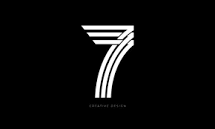

In [28]:
img=image.load_img('7img.jpeg')
img

In [29]:
type(img)

PIL.Image.Image

In [30]:
img_tensor=tf.convert_to_tensor(np.asarray(img))


In [31]:
img_28=tf.image.resize(img_tensor,(28,28))
img_28

<tf.Tensor: shape=(28, 28, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [32]:
img_gray=tf.image.rgb_to_grayscale(img_28)
img_gray

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ]],

       [[  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [

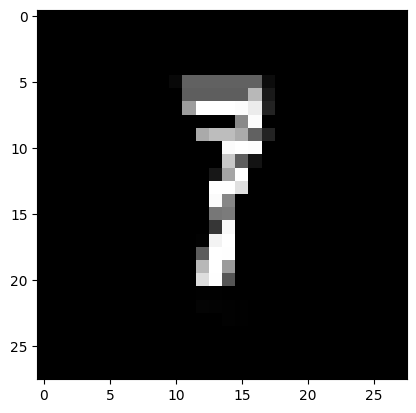

In [33]:
plt.imshow(img_gray,cmap='gray')

In [34]:
img_gray_scaled=img_gray.numpy()/255.0
img_gray_scaled=img_gray_scaled.reshape(1,28,28,1)
img_gray_scaled

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [35]:
xsinglepred=np.argmax(model.predict(img_gray_scaled),axis=1)
print(xsinglepred)

1/1 [==============================] - 0s 21ms/step
[3]


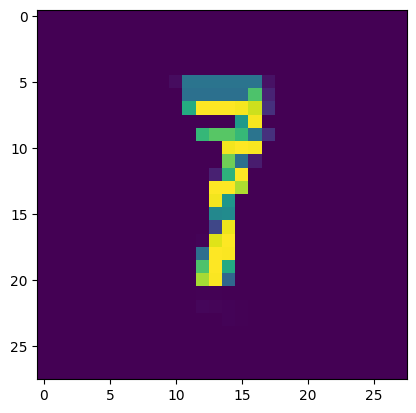

In [36]:
plt.imshow(img_gray_scaled.reshape(28,28))

In [37]:
img_28_gray_inverted=255.0-img_gray
img_28_gray_inverted_scaled=img_28_gray_inverted.numpy()/255.0

In [38]:
pred=np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)


1/1 [==============================] - 0s 24ms/step


In [39]:
print(pred)

[8]
